In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [3]:
#读取数据
df = pd.read_excel('twoline.xlsx')
df  # data frame
df.head()
print(df)

# df['date'] = pd.to_datetime(df['date'])
# df = df.set_index('date')
# # 按照时间升序排列
# df.sort_values(by=['date'], inplace=True, ascending=True)
# df.tail()

     level      to      from       cha
0        3  0.0112  0.016400 -0.005200
1        3  0.0003  0.000000  0.000300
2        3  0.0163  0.015100  0.001200
3        3  0.0071  0.019700 -0.012600
4        3  0.0103  0.017600 -0.007300
..     ...     ...       ...       ...
105      3  0.0018  0.003485 -0.001685
106      3  0.0002  0.000158  0.000042
107      3  0.0128  0.010455  0.002345
108      3  0.0071  0.017741 -0.010641
109      3  0.0066  0.005544  0.001056

[110 rows x 4 columns]


In [4]:
X = df[['cha', 'from']]
y = df['to'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

X_normalizer = StandardScaler() # N(0,1)
X_train = X_normalizer.fit_transform(X_train)
X_test = X_normalizer.transform(X_test)

y_normalizer = StandardScaler()
y_train = y_normalizer.fit_transform(y_train)
y_test = y_normalizer.transform(y_test)

knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train.ravel())
#Now we can predict prices:
y_pred = knn.predict(X_test)
y_pred_inv = y_normalizer.inverse_transform(y_pred)
y_test_inv = y_normalizer.inverse_transform(y_test)

x1=[[2,0.0025]]
print(knn.predict(x1))

[1.19732634]


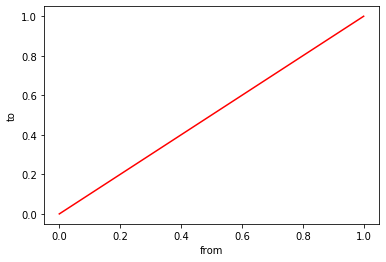

[0.0003  0.0243  0.0003  0.01335 0.04945 0.00015 0.00345 0.0023  0.0104
 0.00425 0.0023  0.0051  0.01895 0.00385 0.01335 0.00375 0.00515 0.00395
 0.0099  0.00605 0.0154  0.0003  0.00495 0.00885 0.00305 0.0024  0.009
 0.01165 0.0229  0.00605 0.0003  0.00305 0.0024 ]


In [5]:

# Now add the perfect prediction line
diagonal = np.linspace(0, 1, 100)
plt.plot(diagonal, diagonal, '-r')
plt.xlabel('from')
plt.ylabel('to')
plt.show()
print(y_pred_inv)


In [6]:
pred = knn.predict(X_test)
pred

array([-0.91612393,  1.05752613, -0.91612393,  0.15704829,  3.12574693,
       -0.92845924, -0.65708236, -0.75165309, -0.0855462 , -0.59129402,
       -0.75165309, -0.52139392,  0.61756664, -0.62418819,  0.15704829,
       -0.63241173, -0.51728215, -0.61596465, -0.12666391, -0.44327027,
        0.3256309 , -0.91612393, -0.53372923, -0.2130111 , -0.68997653,
       -0.74342955, -0.20067578,  0.01724808,  0.94239654, -0.44327027,
       -0.91612393, -0.68997653, -0.74342955])

In [7]:
X = df['from'].values.reshape(-1,1)
y = df['to'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)
print('a = {:.5}'.format(reg.coef_[0][0]))
print('b = {:.5}'.format(reg.intercept_[0]))

print("线性模型为: Y = {:.5}X + {:.5} ".format(reg.coef_[0][0], reg.intercept_[0]))


a = 0.71115
b = 0.0013997
线性模型为: Y = 0.71115X + 0.0013997 


[[0.00282204]]


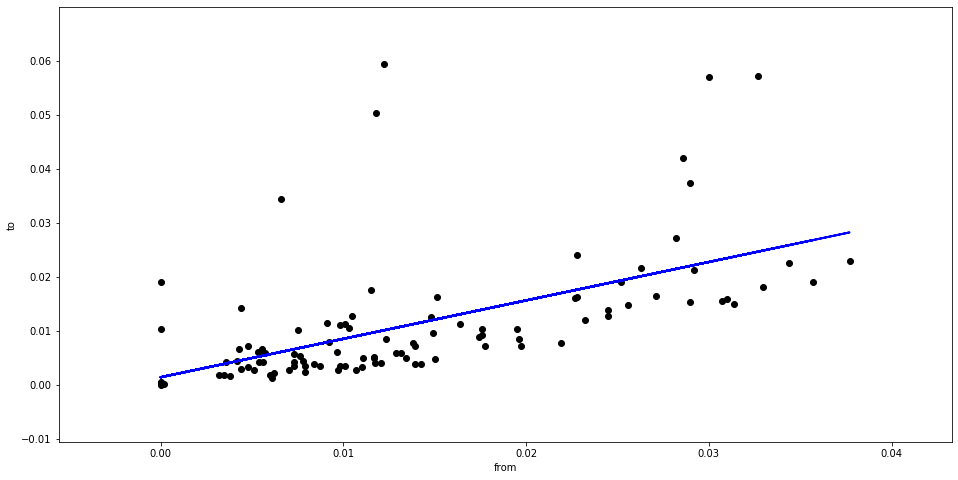

In [53]:
predictions = reg.predict(X)
x1=[[0.002]]
print(reg.predict(x1))

plt.figure(figsize=(16, 8))
plt.scatter(df['from'], df['to'], c ='black')
plt.plot(df['from'], predictions,c ='blue', linewidth=2)
plt.xlabel("from")
plt.ylabel("to")
plt.show()

In [54]:
# 线性模型为: Y = 0.85824X + 0.0042274 
# Y = 0.85824*0.5752 + 0.0042274
# Y = 0.85824*0.01 + 0.0042274
# 郑州轻工业大学的数据模型
# 河南去往比例的线性模型
# Y = 2.1085*0.5752 + -0.76302
# 去往一线城市比例的线性模型
# Y = 1.9317*0.0029 + 0.03908
# 去往二线城市的线性模型
Y = 0.71115*0.016 + 0.0013997
print(Y)

0.012778099999999999
